In [1]:
# Install packages
!pip install ultralytics > /dev/null 2>&1
!pip install roboflow > /dev/null 2>&1

Starting download from: https://videos.nba.com/nba/pbp/media/2023/12/16/0022300339/12/fe273b80-d8a1-3aa1-6c10-37f7731c0569_1280x720.mp4
Download completed. Video saved to: ./input_videos/test.mp4


----------Started: Running ASAS Tracking ----------

Tracking video: ./input_videos/test.mp4
Using tracker config: bytetrack.yaml
Detection confidence threshold: 0.5, IOU threshold: 0.7
Persist results: Yes, Save output: Yes, Show results: No

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs
Results saved to 

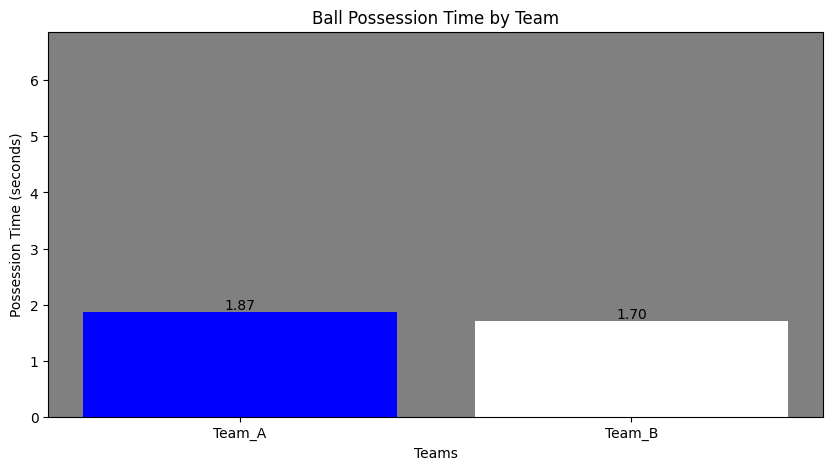

Starting download from: https://videos.nba.com/nba/pbp/media/2023/12/16/0022300339/12/fe273b80-d8a1-3aa1-6c10-37f7731c0569_1280x720.mp4
Download completed. Video saved to: ./input_videos/test.mp4

avi_path: runs/detect/track/test.avi
mp4_output_path: /content/tracked_output_videos/test.mp4
orig_h_w_of_image ->  (720, 1280)
self.bp_frame_color-> {0: 'black', 1: 'black', 2: 'black', 3: 'black', 4: 'black', 5: 'black', 13: 'black', 14: 'black', 15: 'black', 17: 'black', 19: 'black', 20: 'black', 21: 'black', 22: 'black', 23: 'black', 25: 'black', 26: 'black', 27: 'black', 30: 'black', 31: 'black', 39: 'black', 40: 'black', 41: 'black', 42: 'black', 43: 'black', 44: 'black', 45: 'black', 46: 'black', 47: 'black', 48: 'black', 49: 'black', 50: 'black', 51: 'black', 52: 'black', 53: 'black', 54: 'black', 72: 'white', 73: 'white', 74: 'black', 75: 'black', 76: 'black', 77: 'white', 78: 'white', 79: 'white', 81: 'white', 83: 'white', 93: 'white', 94: 'white', 95: 'white', 96: 'white', 97: 'whi

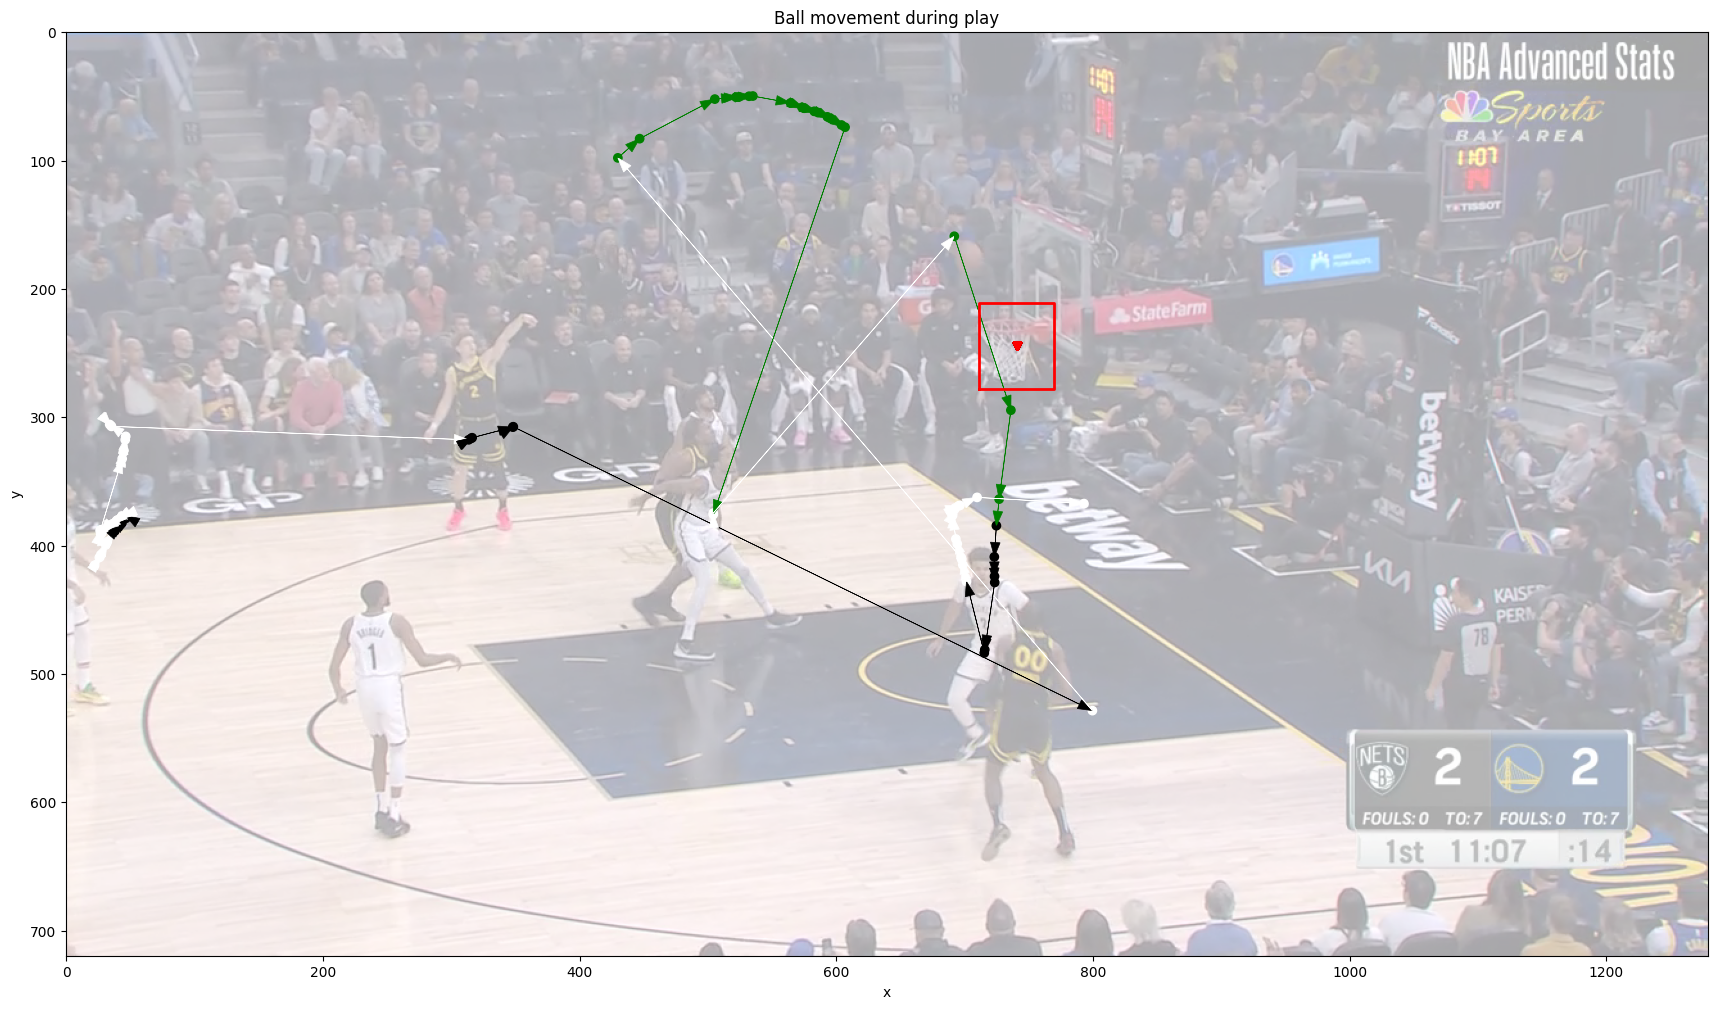

In [1]:
from models.asas import ASAS

# asas_model = ASAS('/content/drive/MyDrive/model/8x_07_best.pt')
asas_model = ASAS('./weights/yolox-10-games.pt', team_a_color='blue', team_b_color='white', device='mps')
# video_url = 'https://videos.nba.com/nba/pbp/media/2024/04/04/0022301124/16/56783a77-7351-383d-0f4d-d19cf1cfc68b_1280x720.mp4'
video_url = 'https://videos.nba.com/nba/pbp/media/2023/12/16/0022300339/12/fe273b80-d8a1-3aa1-6c10-37f7731c0569_1280x720.mp4'
local_save_path = './input_videos/test.mp4'

# Run each analytics type

# 1. Ball Possession Analytics
asas_analytics = asas_model.run_analytics(video_url, local_save_path, analysis_type='BALL_POSSESSION')
asas_analytics.ball_possession_result.plot_ball_possession_time()

# 2. Ball Trajectory Analytics
asas_analytics = asas_model.run_analytics(video_url, local_save_path, analysis_type='BALL_TRAJECTORY')
asas_analytics.ball_trajectory_result.plot_ball_and_net_wrto_net_position()

image_rgb.shape (720, 1280, 3)


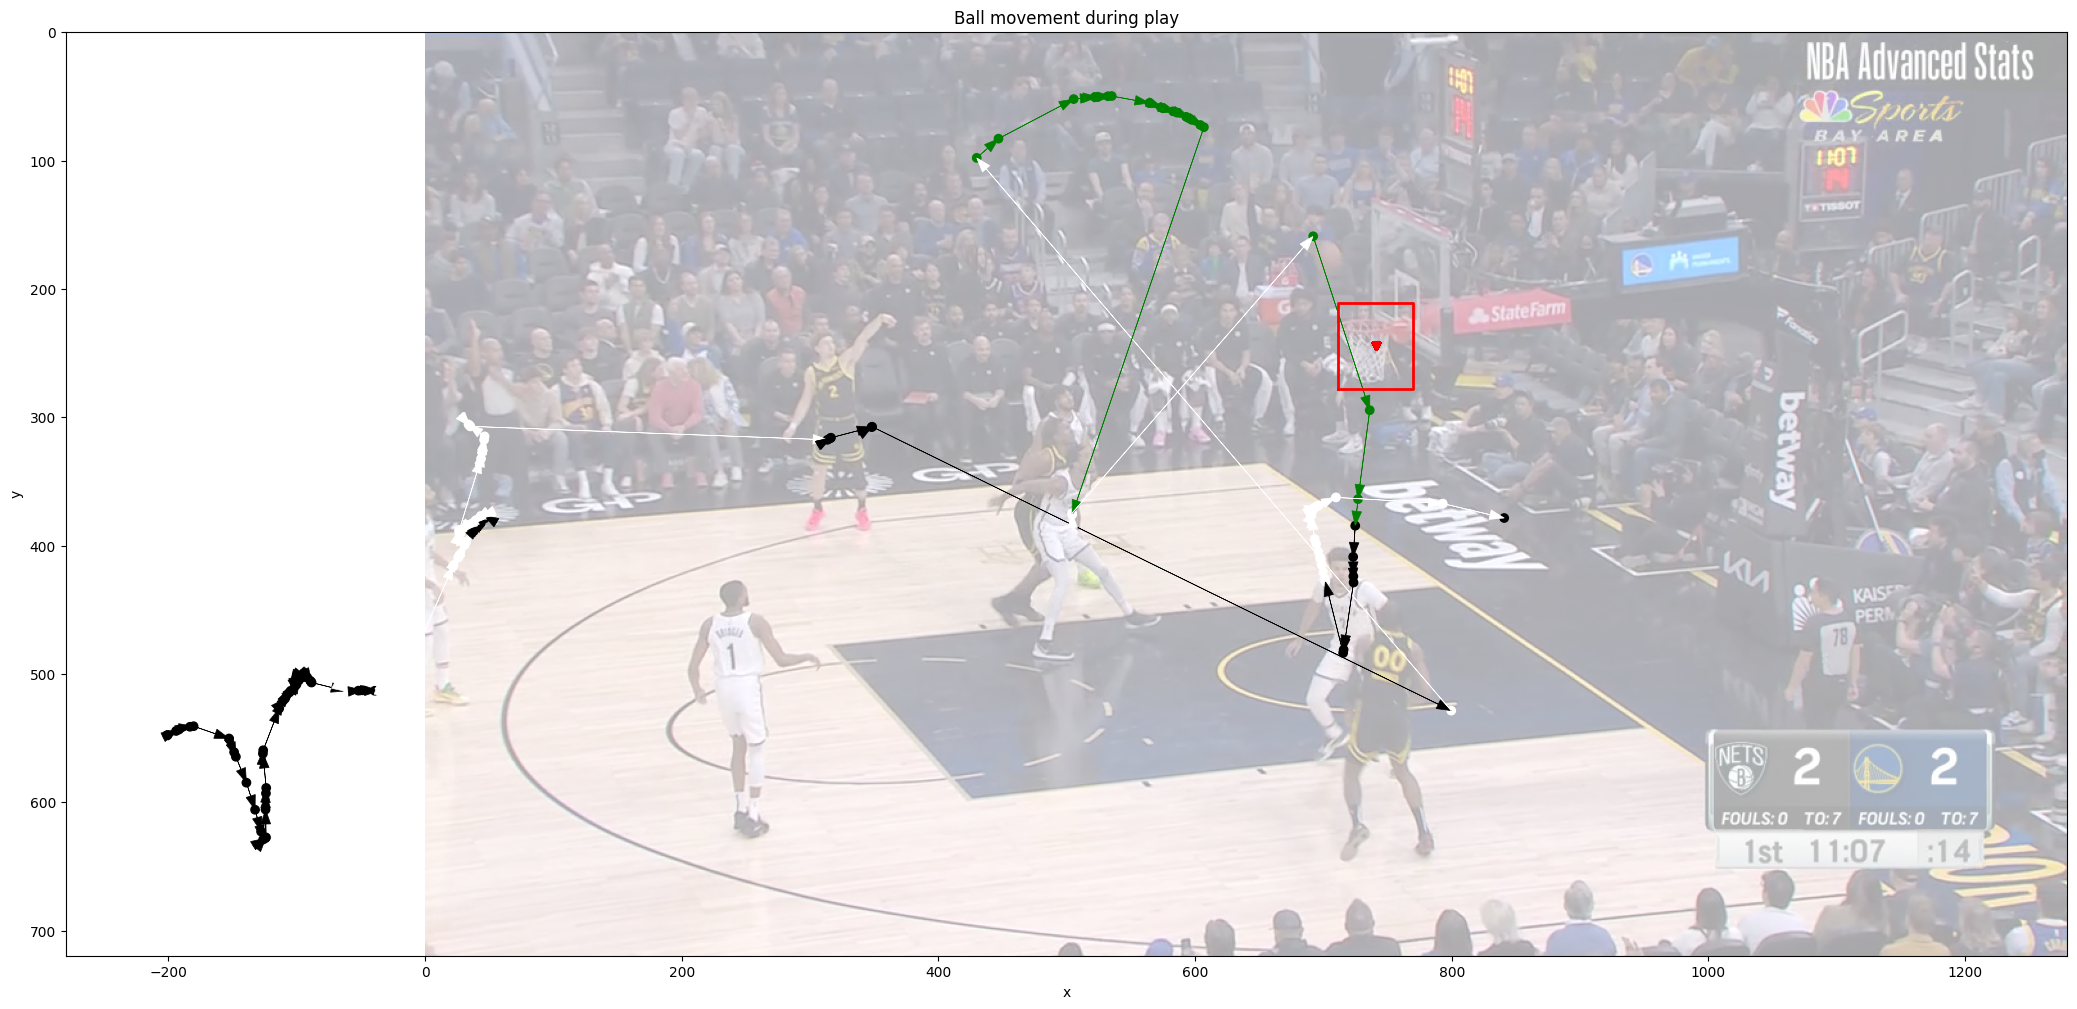

In [2]:
asas_analytics.ball_trajectory_result.plot_ball_and_net_wrto_net_position(False)

In [62]:
#!rm -r '/content/dataset'
!rm -r '/content/runs'
!rm -r '/content/input_videos'
!rm -r '/content/tracked_output_videos'

In [2]:
!pip freeze | grep 'ultralytics'

ultralytics==8.2.6
